# Analysis and visualization for the Ford goBike Data
## by Khaled Emad

## Preliminary Wrangling

> The data i choosed is the Ford GoBike dataset its a dataset than contatins alot of information about idividual bike rides that was made in a bike sharing system the dataset has many columns like Start time , End time ,Start station and End station ID 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
for col in df.columns:
    print(f'For column {col}\n------------------\n')
    print(df[col].value_counts())
    print('\n')

For column duration_sec
------------------

272      311
324      292
323      291
306      291
305      290
        ... 
5803       1
11870      1
5931       1
15964      1
5058       1
Name: duration_sec, Length: 4752, dtype: int64


For column start_time
------------------

2019-02-11 17:05:07.8400    2
2019-02-01 18:24:34.8740    2
2019-02-25 08:52:07.5820    2
2019-02-15 08:43:18.4220    2
2019-02-15 07:47:00.1970    2
                           ..
2019-02-01 10:06:51.1040    1
2019-02-20 18:34:33.2770    1
2019-02-05 09:57:59.7560    1
2019-02-12 12:19:34.3250    1
2019-02-07 17:01:46.0760    1
Name: start_time, Length: 183401, dtype: int64


For column end_time
------------------

2019-02-14 17:26:25.4730    2
2019-02-11 07:47:02.5560    2
2019-02-11 08:03:22.6020    2
2019-02-20 09:40:38.4500    2
2019-02-12 09:07:04.4750    2
                           ..
2019-02-27 17:35:13.9260    1
2019-02-07 10:24:39.2930    1
2019-02-22 20:03:17.7640    1
2019-02-15 09:06:56.4620    1
201

### What is the structure of your dataset?

> the dataset has 183412 raws and 16 columns 

### What is/are the main feature(s) of interest in your dataset?

> Iam intrested in studying the service usage for the subscribers vs customers in terms of ride legnth,ride distance , age and gender and what age and gender has the most bike usage

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that User type will have the most efeect in the investigation as if the user is subscribed it means that the user dedicated more effort in bike riding than the normal customer and member gender and the member birth year 

# Data Cleaning

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

will start with droping the nan values in the dataset

In [9]:
df.dropna(axis = 0, inplace=True)

will change the datatybe of some columns

In [10]:
#change the start time and end time from object to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
#change the start_station_id and end_station_id and bike_id from float to str
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')
#change the User_type and member_gender from object to category
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
#chang the member birth year from float to int 
df['member_birth_year'] = df['member_birth_year'].astype('int')

will add some new columns to help in the investigation

In [11]:
# first will add an age column from the birth date column and make the Dtybe int
df['member_age'] = 2021 - df['member_birth_year']
df['member_age'] = df['member_age'].astype('int')

In [12]:
#then will add colmns that shows the trip duration and the day and the hour of the trip 
df['duration_minute'] = df['duration_sec']/60
df['start_hourofday'] = df.start_time.dt.strftime('%H')
df['start_dayofweek'] = df.start_time.dt.strftime('%A')

In [13]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age,duration_minute
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,36.196865,11.733379
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,10.118731,27.370082
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,20.000000,1.016667
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,29.000000,5.383333
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,34.000000,8.500000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,41.000000,13.150000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,143.000000,1409.133333


In [14]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_minute,start_hourofday,start_dayofweek
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,37,869.750000,17,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,49,1030.900000,12,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,32,608.166667,17,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,47,26.416667,23,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,62,29.883333,23,Thursday


In [15]:
#the describe function showed there is an outlier problem in the age column so will handle it 
df = df.query('member_age <= 80')

## Univariate Exploration

> I will start by looking at the age of the users then the months of and the day of the week 

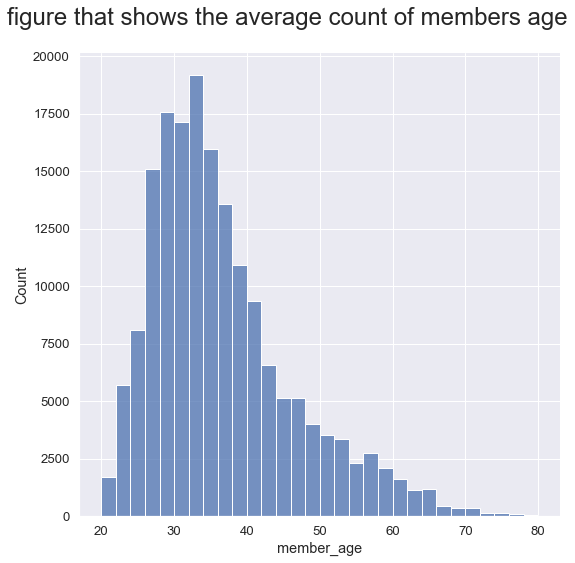

In [83]:
g=sns.displot(df['member_age'],kde=False, bins=30,height=8,aspect=1);
g.fig.suptitle("figure that shows the average count of members age",fontsize=24, fontdict={"weight": "bold"});
g.fig.subplots_adjust(top=.9)

in the figure it shows that the most age is between 25-40 

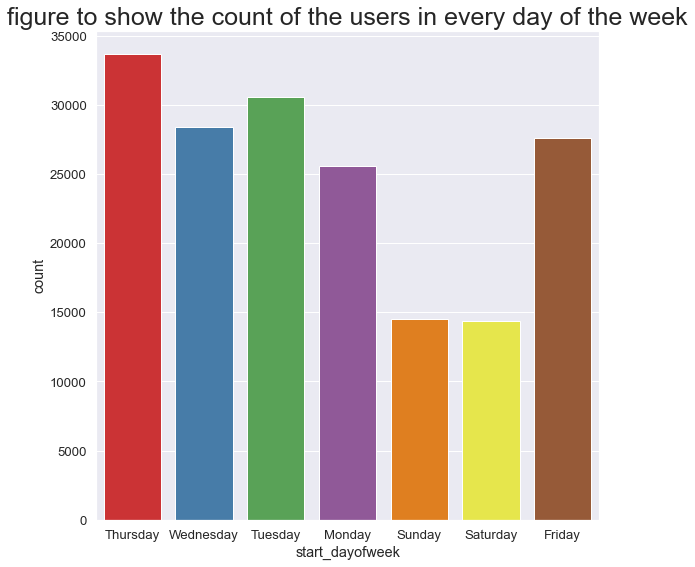

In [35]:
sns.countplot(x='start_dayofweek', data=df, palette='Set1').set_title("figure to show the count of the users in every day of the week",size=25);

The figure shows that thursday is the most day of the week that has the highest count of customers and that sunday and saturday is the lowest in the count

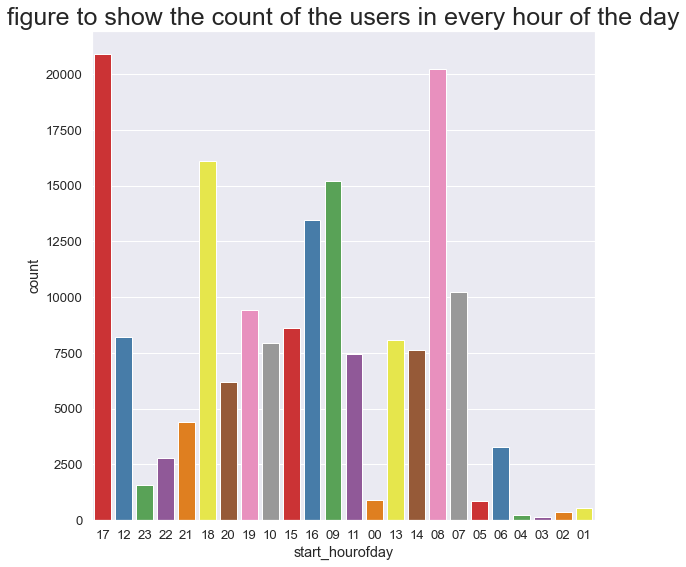

In [36]:
sns.countplot(x='start_hourofday', data=df, palette='Set1').set_title("figure to show the count of the users in every hour of the day",size=25);

In the figure it showed that the most hours that has peaople are 8 AM and 5 PM and the lowest rate of people is between 12 to 4 AM

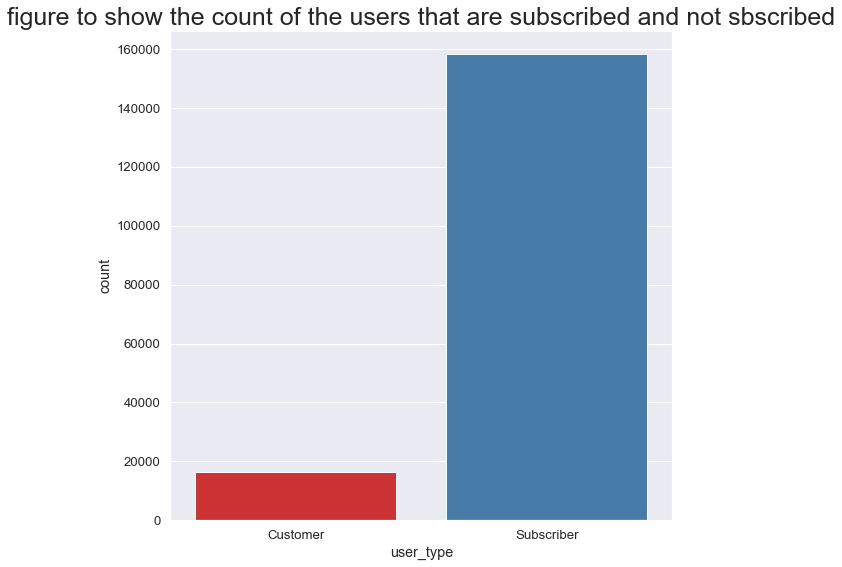

In [37]:
sns.countplot(x='user_type', data=df, palette='Set1').set_title("figure to show the count of the users that are subscribed and not sbscribed",size=25);

The figure showes a huge variance in the number of subscribers vs the normal customers

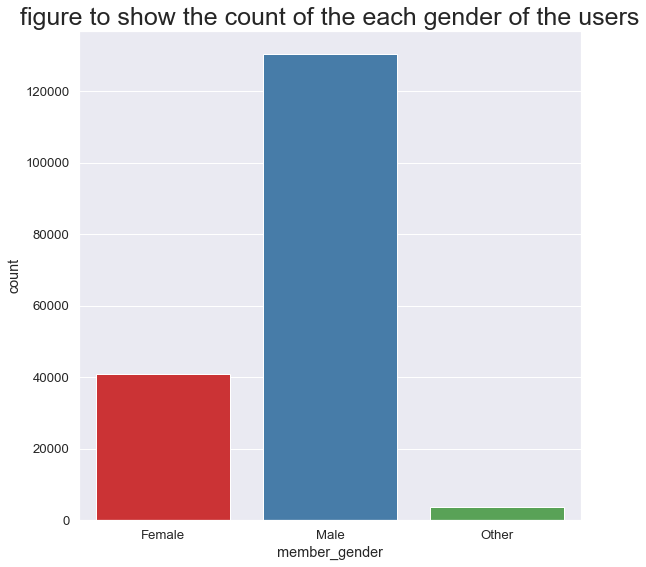

In [38]:
sns.countplot(x='member_gender', data=df, palette='Set1').set_title("figure to show the count of the each gender of the users",size=25);

As it is shown in the figure the number of Male bikers is almost triple the female bikers 

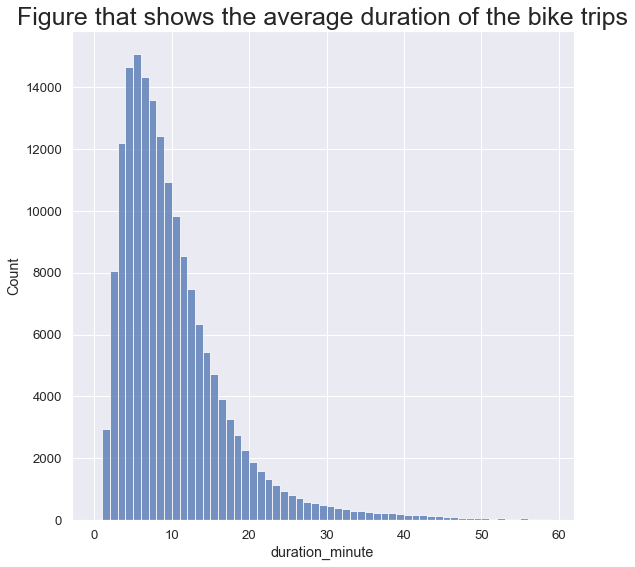

In [52]:
sns.histplot(data=df, x="duration_minute",bins=np.arange(0, 60, 1)).set_title("Figure that shows the average duration of the bike trips",size=25);

As it shows in the figure the most trips duration were between 5-10 minutes

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The figures showed that most of the riders age is between 25-40 and that weekend days has the lowest count of riders and that 8 AM and 5 PM has the most count of riders and that most of the riders are subscribed and most of the riders are males and that most of the trips were between 5-10 minutes  
no transformation were needed 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The only unusual distributions was in the age column which most of the age were between 17 and 60 and there was an outlier in people which has age bigger than 100 years so the outlier were handled and added some new columns to help in the investigation like member age , trip duration,day of the week and trip hour 

## Bivariate Exploration



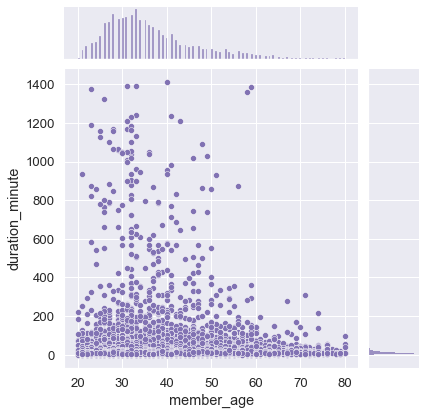

In [57]:
X=sns.jointplot(x='member_age', y='duration_minute', data=df, color='m');

In the figure it shows that the older people trips have the same time as young people as most of the trips fall in the same time range

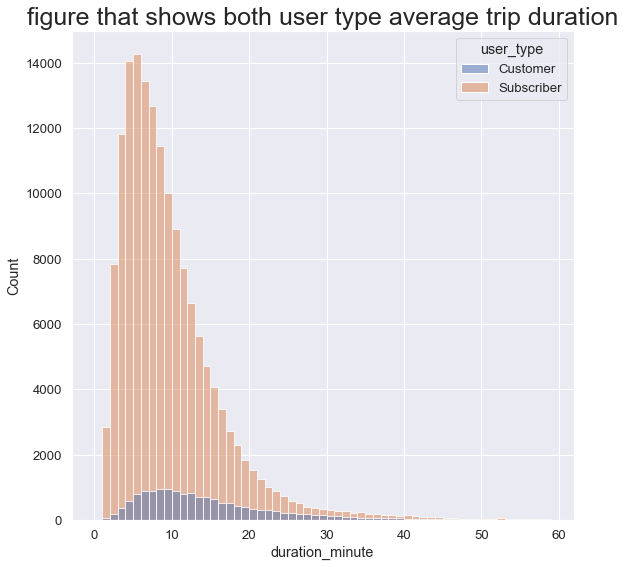

In [58]:
sns.histplot(data=df, x="duration_minute",hue='user_type',bins=np.arange(0, 60, 1)).set_title("figure that shows both user type average trip duration",size=25);

It shows in this figure that the customers trips between 25 to 30 minutes are are the same numbers as the subscribers which shows that the customers like to take some long trips 

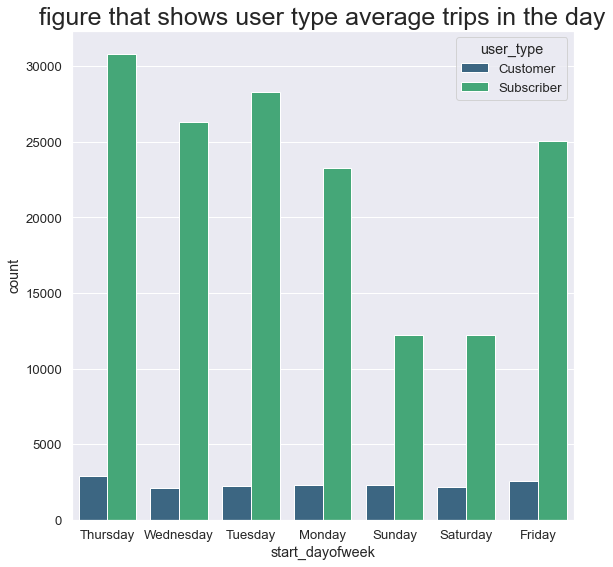

In [59]:
sns.countplot(x='start_dayofweek', data=df, hue='user_type', palette='viridis').set_title("figure that shows user type average trips in the day",size=25);

In the figure it shows that customers doesn't have a very high day in the number of trips unlike the subscribers which means that customers likes to take bike trips almost all weekdays 

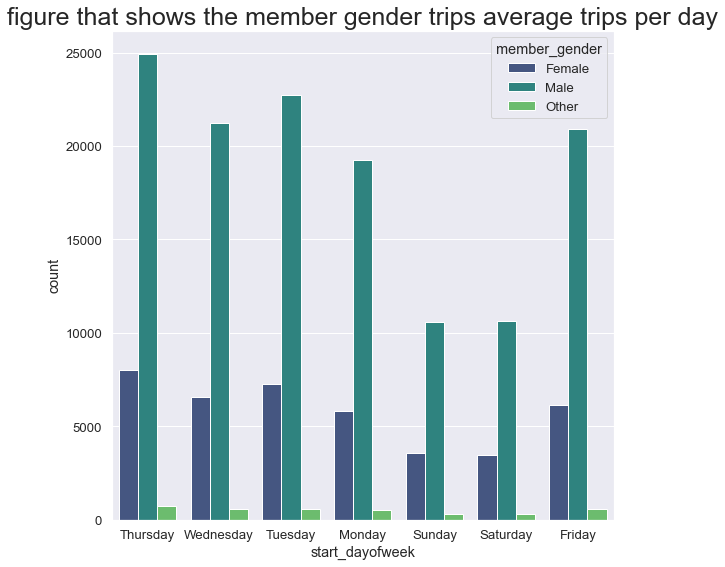

In [60]:
sns.countplot(x='start_dayofweek', data=df, hue='member_gender', palette='viridis').set_title("figure that shows the member gender trips average trips per day",size=25);

In the figure it also shows that female trips has the same peak day as men and the same low days 

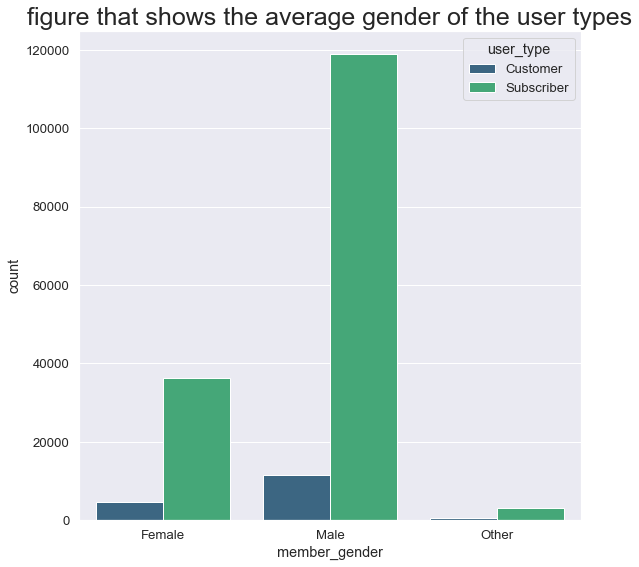

In [61]:
sns.countplot(x='member_gender', data=df, hue='user_type', palette='viridis').set_title("figure that shows the average gender of the user types",size=25);

The figure shows that also the female subscribers count is very huge than the customers count

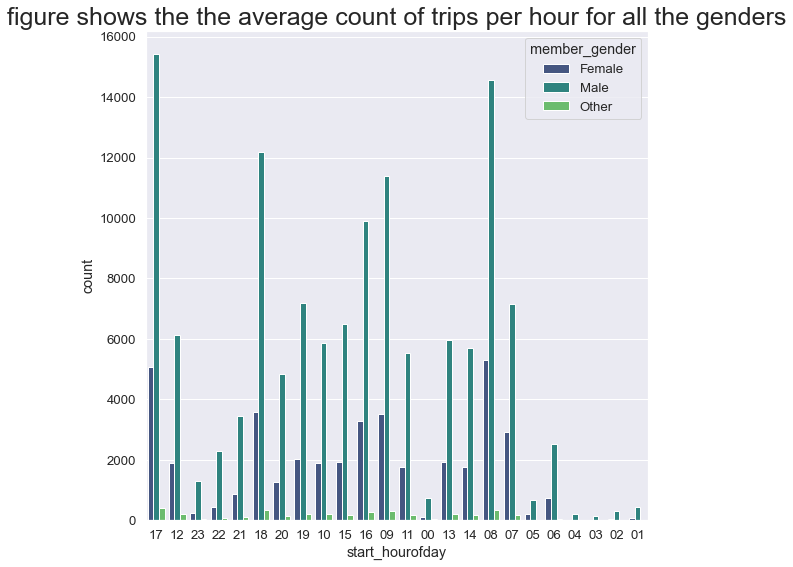

In [62]:
sns.countplot(x='start_hourofday', data=df, hue='member_gender', palette='viridis').set_title("figure shows the the average count of trips per hour for all the genders",size=25);

The figure shows that female rides starts to get low starting from 11PM to 4 AM as it reches very low count in the trips at the hours between 2 to 4 AM

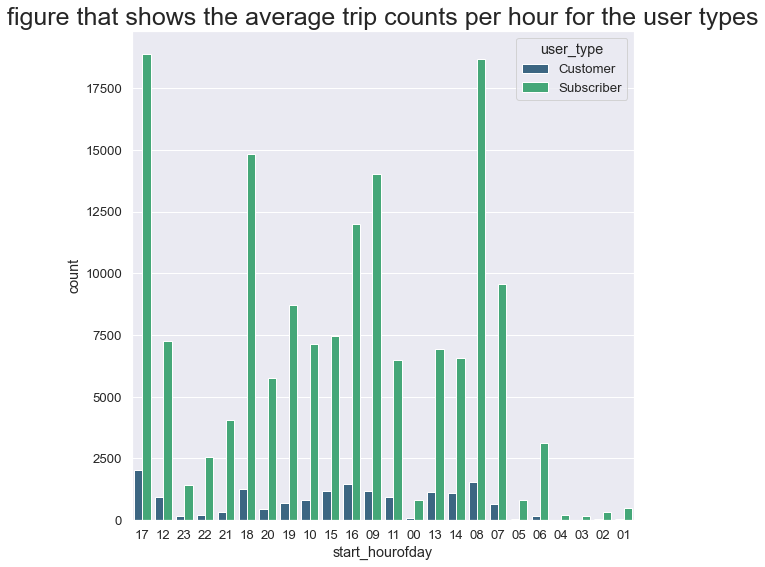

In [63]:
sns.countplot(x='start_hourofday', data=df, hue='user_type', palette='viridis').set_title("figure that shows the average trip counts per hour for the user types",size=25);

The figure shows that customers rides are mainly high between 2 too 6 PM and so few count of bike trips at late night hours

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The figures showed alot more subscribers count than the normal customer count which means that the subscribers use their bikes for there daily routine like going to work or school and that was showed in the peak subscribers hours which was 8 AM and 5 PM unlike the customers which might use the bike only for fun 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The main interest for me was finding that customers trip duration were actually longer than the subscriber duration as in the 20 to 30 minutes trip durations customers were actually more than the subscribers which confirms my investigation that the customers only use the bike for fun unlike the subscriber which use the bike for the daily routine 

## Multivariate Exploration

In [47]:
df_corr = df.corr()
df_corr

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age,duration_minute
duration_sec,1.000000,0.012275,-0.040989,0.012892,-0.041480,-0.007217,0.007217,1.000000
start_station_latitude,0.012275,1.000000,-0.678336,0.990133,-0.683775,-0.075743,0.075743,0.012275
start_station_longitude,-0.040989,-0.678336,1.000000,-0.682830,0.992518,0.126645,-0.126645,-0.040989
end_station_latitude,0.012892,0.990133,-0.682830,1.000000,-0.685316,-0.075926,0.075926,0.012892
end_station_longitude,-0.041480,-0.683775,0.992518,-0.685316,1.000000,0.127576,-0.127576,-0.041480
member_birth_year,-0.007217,-0.075743,0.126645,-0.075926,0.127576,1.000000,-1.000000,-0.007217
member_age,0.007217,0.075743,-0.126645,0.075926,-0.127576,-1.000000,1.000000,0.007217
duration_minute,1.000000,0.012275,-0.040989,0.012892,-0.041480,-0.007217,0.007217,1.000000


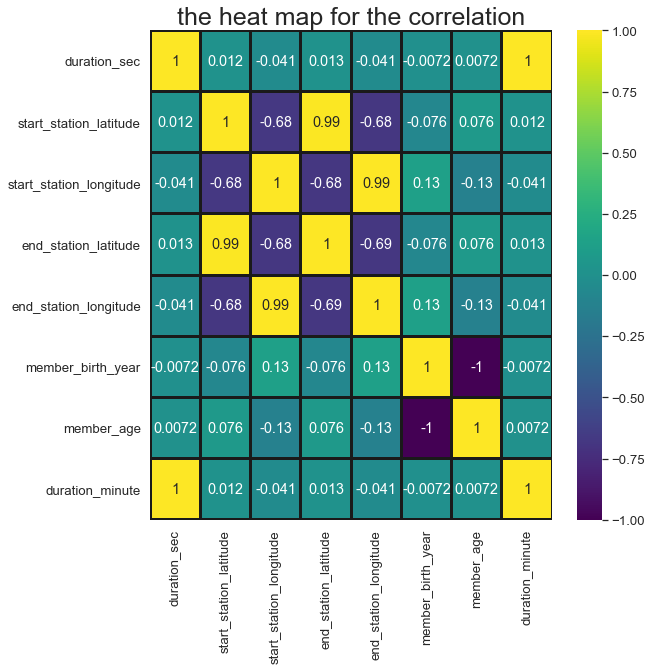

In [64]:
sns.heatmap(df_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True).set_title("the heat map for the correlation",size=25);

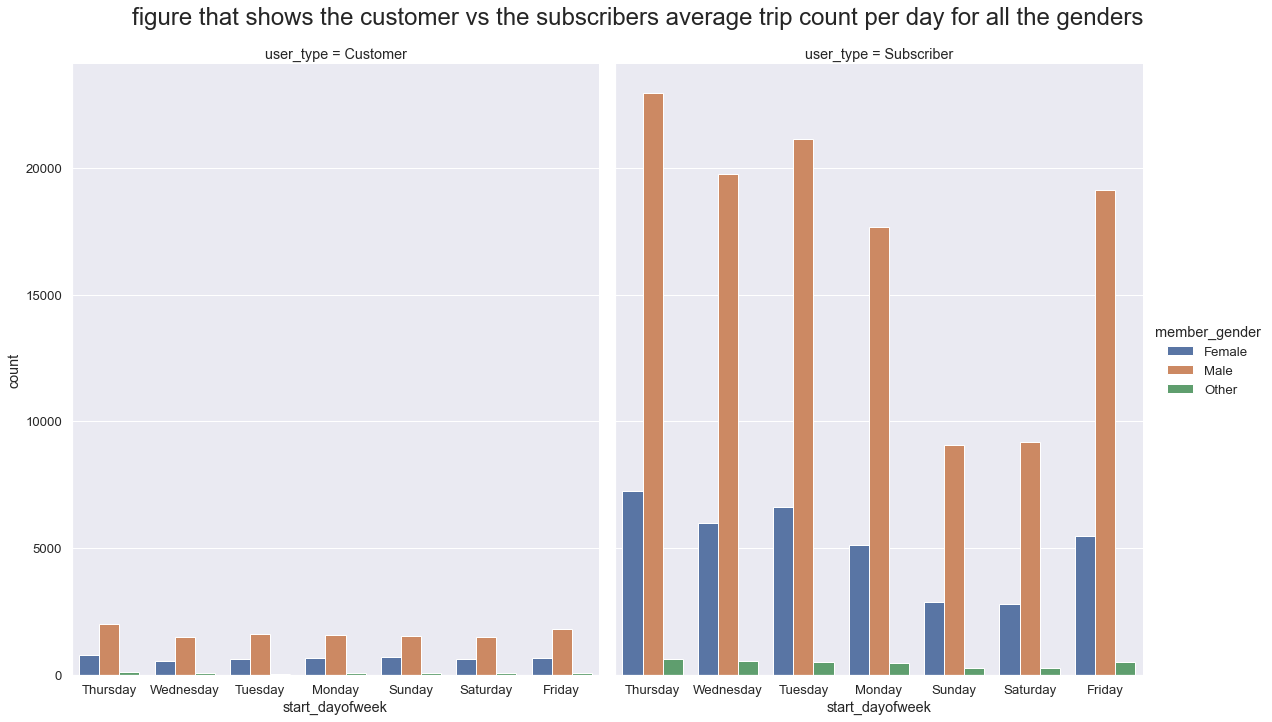

In [79]:
g = sns.catplot(x="start_dayofweek", hue="member_gender", col="user_type",
                data=df, kind="count",
                height=10, aspect=0.8);
g.fig.suptitle("figure that shows the customer vs the subscribers average trip count per day for all the genders",fontsize=24, fontdict={"weight": "bold"});
g.fig.subplots_adjust(top=.9)


The figure Shows that almost all the week day has the same numbers of customers in all the genders unlike the subscribers figures which shows peak and low count numbers in the weekdays

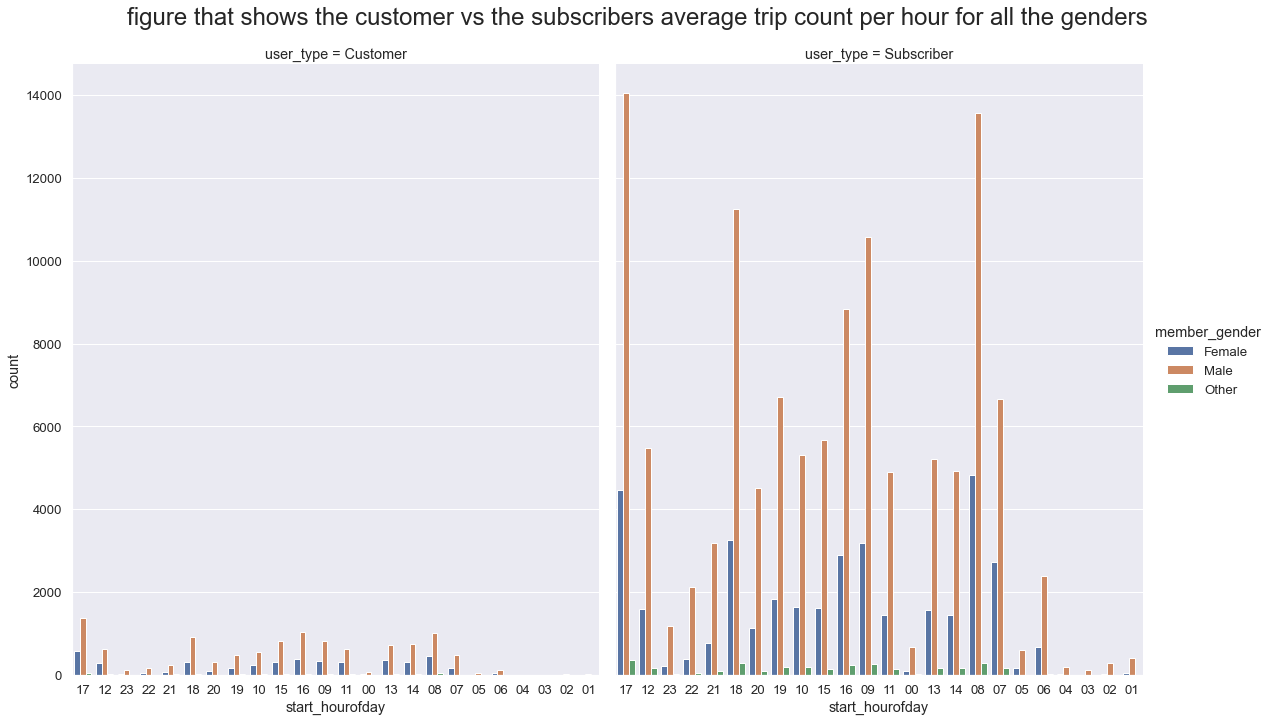

In [80]:
g = sns.catplot(x="start_hourofday", hue="member_gender", col="user_type",
                data=df, kind="count",
                height=10, aspect=0.8);
g.fig.suptitle("figure that shows the customer vs the subscribers average trip count per hour for all the genders",fontsize=24, fontdict={"weight": "bold"});
g.fig.subplots_adjust(top=.9)

Also the subscribers figure confirms the investigation above that the subscribers like to take bike trips in the hours between 2 to 6 PM

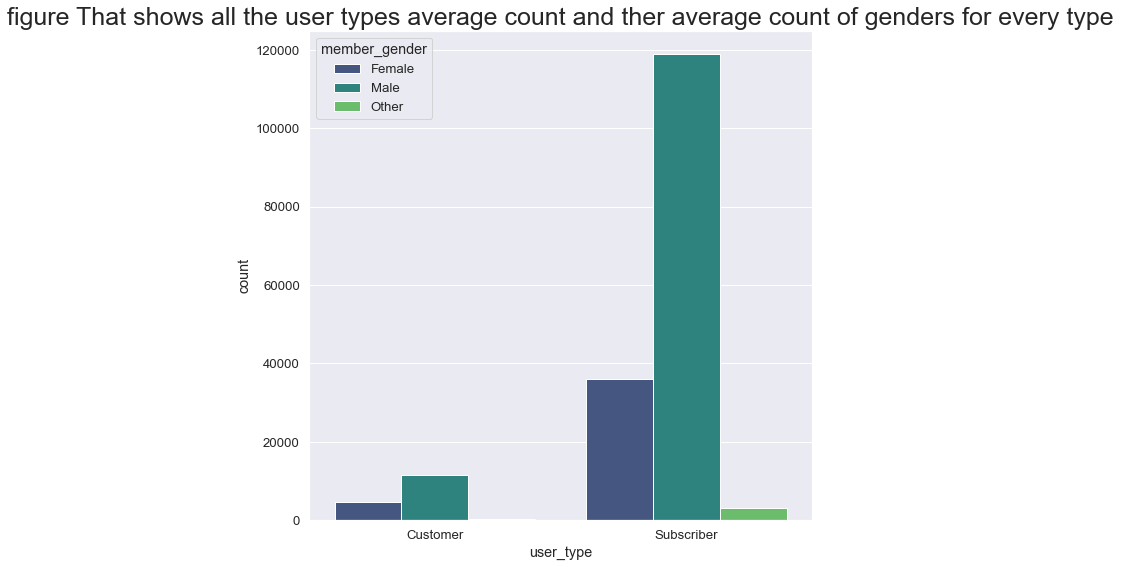

In [81]:
sns.countplot(x='user_type', data=df, hue='member_gender', palette='viridis').set_title("figure That shows all the user types average count and ther average count of genders for every type",size=25);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivarient analysis only confirmed the previous investigation about the member gender and user type

### Were there any interesting or surprising interactions between features?

> the figure showed a very little numbers of customers in the users between 1 to 4 PM and that the female numbers start to decrease at late night starting from 8 PM 